# DATA2 -  Linear Mixed Effect Models


**Resources**
1. DATA
    1. [data/data2](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2) - csv files downloaded from ADNI,
    1. [data/data2_FS](https://github.com/MMIV-ML/MCI-subgroups/tree/master/data/data2_FS) - FS result csv files,
    1. [data_zip/20201109_data2_file_versions](https://github.com/MMIV-ML/MCI-subgroups/blob/master/data/data_zip/20201109_data2_file_versions.pdf) - download ADNI web page screen shoot taken for downaloaded csv files (some of file neames are printed with dates),
1. RESULTS
    1. [results/20210114](https://github.com/MMIV-ML/MCI-subgroups/tree/master/results/20210114) - result folder,
    1. [results/20210114/README.md](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20210114/README.md) - short description,
1. GOOGLE DRIVE
    1. [slides](https://docs.google.com/presentation/d/1aEK7M5BPe0RxWYskzQCEDbT4Mf-4mRRqQ5uJ_YuqRzg/edit#slide=id.p) - link to google slides (**OUT OF DATE, MUST BE UPDATED !!!**),
    1. [GoogleDrive](https://drive.google.com/drive/folders/1r8l2R88-0T8Xahk30iAgjBCWXvV1R2J-) - main google drive slide folder,
1. GIT HUB
    1. [GitHub](https://github.com/MMIV-ML/MCI-subgroups) - main repo folder,
1. FEATURES
    1. Included features ([local](../results/20201110/features_included.csv), [GitHub](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/features_included.csv)) - a file with a feature list included in each subproject (sMCI-cAD, baseline) 
    1. Features to include ([local](../results/20201110/features_to_include.csv), [GitHub](https://github.com/MMIV-ML/MCI-subgroups/blob/master/results/20201110/features_to_include.csv))- a least of featrues from different csv files to combine with ADNIMERGE  
    
---

INCLUDES THE FOLLOWING FEATURES:
1. ADAS13_adnI,
1. LRLV_n_long - normalized (L+R)LV longitudinal volume
1. LRLV_n_corss - normalized (L+R)LV crosssectional volume.

---

The latest changes (ver. 0.04):

    - selection Train test from the long table
    
    - instaled packages version check at the begening
    - slight corrections, typoes
    
    
   *Created: 2021.01.14 / Updated: 2021.04.06*

---

#### IMPORTS

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display

In [3]:
import mci_info as minfo
import mci_lmem as mlmem
import mci_utils as mutils
import mci_freesurfer as mfs

In [4]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

#### GLOBAL VARIABLES

In [5]:
# Notebook folder
NB_DIR = %pwd
NB_DIR = Path(NB_DIR)
# Root MCI foler
ROOT_DIR = NB_DIR.parent
# Main data folder (with downloaded csv files)
MAIN_DATA_DIR = ROOT_DIR/'data/data2'
DATA_DIR_FS = ROOT_DIR / 'data/data2_FS'
# Current data dir with sMCI_cAD.csv & bl.csv files
CURRENT_DATA_DIR = ROOT_DIR/'results/20201110'
# Results folder
RESULTS_DIR = ROOT_DIR/'results/20210404'
#RESULTS_DIR.mkdir(parents=True, exist_ok=True)

#### INSTALLED PACKAGES INFO

In [6]:
if 1:
    packages = ['numpy', 'scipy', 'seaborn', 'pandas', 'matplotlib', 'statsmodels', 'ipywidgets','eli5', 'pdpbox']
    display(mutils.package_versions(installedOnly=False, theMostImportant=packages))



Computer name: mk-prec-7540
Operating system: Linux, 64bit

Python path: /home/marek/miniconda3/envs/py37/bin/python
Python version: 3.7.9 (default, Aug 31 2020, 12:42:55) 
[GCC 7.3.0]



,module,version
4,eli5,0.11.0
6,ipywidgets,7.6.2
9,matplotlib,3.1.1
11,numpy,1.19.2
13,pandas,1.1.5
14,pdpbox,0.2.1
18,scipy,1.5.2
19,seaborn,0.11.1
22,statsmodels,0.11.1


---

# LOAD DATA

In [7]:
file_name = 'long.csv'
long_all = pd.read_csv(CURRENT_DATA_DIR / file_name, index_col=0)
print(f'Rows in long_all: {long_all.shape[0]}')

Rows in long_all: 6327


In [8]:
#minfo.df_info(long_all, name='long')

#### SELECT THE TRAIN SUBSET

In [9]:
long_train = long_all.loc[long_all.Usage_ == 'train'].copy()
print(f'Rows in train set: {long_train.shape[0]}')

Rows in train set: 5021


#### COLUMN GROUP INFO

In [10]:
minfo.included_feature_info(long_train, pattern='adni-adas-neuro-gds-cross-long-_')

Total number of columns: 94



,adni (#30),adas (#16),neuro (#14),gds (#5),long (#7),cross (#7),ours (#15)
0,ABETA,MERGE_long_adas,ANARTERR_neuro,EXAMDATE_gds,Left-Hippocampus_long,Left-Hippocampus_cross,ADAS13_adni_Nr_
1,ADAS13_adni,Q10_adas,AVDEL30MIN_neuro,GDTOTAL_gds,Left-Lateral-Ventricle_long,Left-Lateral-Ventricle_cross,Abeta_
2,AGE,Q11_adas,AVDELTOT_neuro,MERGE_long_gds,Right-Hippocampus_long,Right-Hippocampus_cross,Age_at_scan_
3,APOE4,Q12_adas,AVTOT6_neuro,Phase_gds,Right-Lateral-Ventricle_long,Right-Lateral-Ventricle_cross,Age_at_scan_rounded_
4,CDRSB,Q13_adas,AVTOTB_neuro,VISCODE2_gds,complete_long,complete_cross,Age_bin_
5,DX,Q1_adas,CATANIMSC_neuro,,eTIV_x_long,eTIV_x_cross,Age_rounded_
6,DX_bl,Q2_adas,CLOCKSCOR_neuro,,eTIV_y_long,eTIV_y_cross,Idx_
7,EXAMDATE,Q3_adas,COPYSCOR_neuro,,,,Imageuid_
8,FAQ,Q4_adas,EXAMDATE_neuro,,,,MRIs_Nr_
9,IMAGEUID,Q5_adas,MERGE_long_neuro,,,,Participation_length_yr_


---

### FREESURFER COLUMN PREPARATION

#### 1. RENAME LONG LATERAL-VETRICLE-CROSS COLUMN NAME WITH SHORTER ONES

In [11]:
long_train = mfs.shorten_FS_long_names(long_train)

#### 2. RENAME eTIV_x, AND DROP eTIV_Y

In [12]:
long_train = mfs.compare_eTIV_x_and_eTIV_y(long_train)

#### 3. CALCULATE SUM AND NORMALIZED SUM OF LEFT AND RIGHT LATERAL VETNRICE VOLUME

New columns:

1. LRLV\_{cross, long} - sum of left and right lateral ventricles $$LRLV = LLV + RLV$$ 
2. LRLV\_n\_{cross, long} - normalized sum of left and right lateral vetnricles $$LRLV_n=\frac{LLV + RLV}{eTIV}$$

In [13]:
long_train = mfs.calculate_sum_of_vetricle_volumes(long_train)

#### 4. SELECT A FEW COLUMNS

In [14]:
long_train = long_train[['RID', 'PTID', 'Age_at_scan_', 'Subgroup_', 'ADAS13_adni', 'FAQ',
                'LLV_long', 'RLV_long', 'eTIV_long', 'LRLV_long', 'LRLV_n_long', 'LLV_cross', 'RLV_cross', 'LRLV_cross', 'LRLV_n_cross', 'eTIV_cross']]
#info.df_info(df, k=7, name='Selected columns from sMCi_cAD')
long_train.head(2)

,RID,PTID,Age_at_scan_,Subgroup_,ADAS13_adni,FAQ,LLV_long,RLV_long,eTIV_long,LRLV_long,LRLV_n_long,LLV_cross,RLV_cross,LRLV_cross,LRLV_n_cross,eTIV_cross
0,4,022_S_0004,67.500000,sMCI,21.33,0.0,20454.2,19629.4,1.662839e+06,40083.6,0.024106,21130.0,19883.8,41013.8,0.024392,1.681447e+06
1,4,022_S_0004,67.979124,sMCI,25.33,0.0,20632.3,20158.4,1.662839e+06,40790.7,0.024531,21146.4,20421.3,41567.7,0.025022,1.661271e+06


### 5. SUMMARY / COMPARISION


In [16]:
minfo.included_feature_info(long_train, pattern='adni-cross-long-_')

Total number of columns: 16



,adni (#4),long (#5),cross (#5),ours (#2)
0,ADAS13_adni,LLV_long,LLV_cross,Age_at_scan_
1,FAQ,LRLV_long,LRLV_cross,Subgroup_
2,PTID,LRLV_n_long,LRLV_n_cross,
3,RID,RLV_long,RLV_cross,
4,,eTIV_long,eTIV_cross,


In [17]:
long_train.head(3)

,RID,PTID,Age_at_scan_,Subgroup_,ADAS13_adni,FAQ,LLV_long,RLV_long,eTIV_long,LRLV_long,LRLV_n_long,LLV_cross,RLV_cross,LRLV_cross,LRLV_n_cross,eTIV_cross
0,4,022_S_0004,67.500000,sMCI,21.33,0.0,20454.2,19629.4,1.662839e+06,40083.6,0.024106,21130.0,19883.8,41013.8,0.024392,1.681447e+06
1,4,022_S_0004,67.979124,sMCI,25.33,0.0,20632.3,20158.4,1.662839e+06,40790.7,0.024531,21146.4,20421.3,41567.7,0.025022,1.661271e+06
2,4,022_S_0004,68.515740,sMCI,22.00,0.0,19757.0,19648.4,1.662839e+06,39405.4,0.023698,20224.9,19651.8,39876.7,0.024062,1.657278e+06


---

# Linear Mixed Effect Models

### FAQ

In [18]:
df_faq = mlmem.get_not_nan_score_values(long_train, 'FAQ')

***** FAQ *****

NaN values in FAQ column:
		NaN: 1346
		Null:1346

Rows in the df without NaN: 3675
Rows in the full df (with NaN): 5021


In [19]:
#https://www.statsmodels.org/devel/missing.html
md_faq = smf.mixedlm("FAQ~Age_at_scan_", df_faq, groups=df_faq["RID"], re_formula="~Age_at_scan_", missing='drop')
mdf_faq = md_faq.fit(method=["lbfgs"])
print(mdf_faq.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      FAQ        
No. Observations:        3675         Method:                  REML       
No. Groups:              566          Scale:                   8.2441     
Min. group size:         2            Log-Likelihood:          -10948.9565
Max. group size:         16           Converged:               Yes        
Mean group size:         6.5                                              
--------------------------------------------------------------------------
                           Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------
Intercept                 -106.085    5.831 -18.193 0.000 -117.514 -94.656
Age_at_scan_                 1.482    0.078  18.901 0.000    1.328   1.636
Group Var                13268.666  460.254                               
Group x Age_at_scan_ Cov  -178.505    6.158 

### ADAS13\_adni

In [17]:
df_adas = mlmem.get_not_nan_score_values(long_train, 'ADAS13_adni')

***** ADAS13_adni *****

NaN values in ADAS13_adni column:
		NaN: 1460
		Null:1460

Rows in the df without NaN: 3561
Rows in the full df (with NaN): 5021


### LME MODEL

In [18]:
#https://www.statsmodels.org/devel/missing.html
md_adas = smf.mixedlm("ADAS13_adni~Age_at_scan_", df_adas, groups=df_adas["RID"], re_formula="~Age_at_scan_", missing='drop')
mdf_adas = md_adas.fit(method=["lbfgs"])
print(mdf_adas.summary())

                  Mixed Linear Model Regression Results
Model:                   MixedLM      Dependent Variable:      ADAS13_adni
No. Observations:        3561         Method:                  REML       
No. Groups:              566          Scale:                   15.9241    
Min. group size:         2            Log-Likelihood:          -11687.4847
Max. group size:         15           Converged:               Yes        
Mean group size:         6.3                                              
--------------------------------------------------------------------------
                           Coef.   Std.Err.    z    P>|z|  [0.025   0.975]
--------------------------------------------------------------------------
Intercept                 -107.260    7.179 -14.942 0.000 -121.330 -93.190
Age_at_scan_                 1.691    0.099  17.100 0.000    1.497   1.885
Group Var                18830.783  525.255                               
Group x Age_at_scan_ Cov  -262.596    7.222 

### (L+R)LV_n_long

In [19]:
df_lrlvn_long = mlmem.get_not_nan_score_values(long_train, 'LRLV_n_long')

***** LRLV_n_long *****

NaN values in LRLV_n_long column:
		NaN: 2018
		Null:2018

Rows in the df without NaN: 3003
Rows in the full df (with NaN): 5021


In [20]:
md_lrlvn_long = smf.mixedlm("LRLV_n_long~Age_at_scan_", df_lrlvn_long, groups=df_lrlvn_long["RID"], re_formula="~Age_at_scan_", missing='drop')
mdf_lrlvn_long = md_lrlvn_long.fit(method=["lbfgs"])
print(mdf_lrlvn_long.summary())

/home/marek/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    LRLV_n_long
No. Observations:      3003       Method:                REML       
No. Groups:            560        Scale:                 0.0000     
Min. group size:       1          Log-Likelihood:        13279.9212 
Max. group size:       11         Converged:             Yes        
Mean group size:       5.4                                          
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                -0.086    0.002 -48.110 0.000 -0.089 -0.082
Age_at_scan_              0.002    0.000  59.877 0.000  0.001  0.002
Group Var                 0.000    0.009                            
Group x Age_at_scan_ Cov -0.000    0.000                            
Age_at_scan_ Var          0.000    0.000          

### (L+R)LV\_n\_cross

In [21]:
df_lrlvn_cross = mlmem.get_not_nan_score_values(long_train, 'LRLV_n_cross')

***** LRLV_n_cross *****

NaN values in LRLV_n_cross column:
		NaN: 2013
		Null:2013

Rows in the df without NaN: 3008
Rows in the full df (with NaN): 5021


In [22]:
md_lrlvn_cross = smf.mixedlm("LRLV_n_cross~Age_at_scan_", df_lrlvn_cross, groups=df_lrlvn_cross["RID"], re_formula="~Age_at_scan_", missing='drop')
mdf_lrlvn_cross = md_lrlvn_cross.fit(method=["lbfgs"])
print(mdf_lrlvn_cross.summary())

/home/marek/miniconda3/envs/py37/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


               Mixed Linear Model Regression Results
Model:                MixedLM    Dependent Variable:    LRLV_n_cross
No. Observations:     3008       Method:                REML        
No. Groups:           561        Scale:                 0.0000      
Min. group size:      1          Log-Likelihood:        13233.9840  
Max. group size:      11         Converged:             Yes         
Mean group size:      5.4                                           
--------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z| [0.025 0.975]
--------------------------------------------------------------------
Intercept                -0.089    0.002 -48.456 0.000 -0.092 -0.085
Age_at_scan_              0.002    0.000  60.155 0.000  0.002  0.002
Group Var                 0.000    0.009                            
Group x Age_at_scan_ Cov -0.000    0.000                            
Age_at_scan_ Var          0.000    0.000          

---

### GET MODEL PARAMETERS & SAVE TO CSV FILES

In [21]:
s_dir = RESULTS_DIR
mutils.textWrap(f'Results saved to folder:   {str(s_dir.stem)}')

if 0:
    score = 'FAQ'
    mutils.textWrap(score)
    df = df_faq
    mdf = mdf_faq
    save_to_file_faq = False
    
    df_lmem_faq= mlmem.get_features_from_LMEM(score, df, mdf, save_dir=s_dir, save_to_file=save_to_file_faq)
    display(df_lmem_faq.head())

if 0:
    score = 'ADAS13_adni'
    mutils.textWrap(score)
    df = df_adas
    mdf = mdf_adas
    save_to_file_adas = False
    
    df_lmem_adas= mlmem.get_features_from_LMEM(score, df, mdf, save_dir=s_dir, save_to_file=save_to_file_adas)
    display(df_lmem_adas.head())

if 0:
    score = 'LRLV_n_long'
    mutils.textWrap(score)
    df = df_lrlvn_long
    mdf = mdf_lrlvn_long
    save_to_file_lrlv_n_long = False
    
    df_lmem_lrlvn_long = mlmem.get_features_from_LMEM(score, df, mdf, save_dir=s_dir, save_to_file=save_to_file_lrlv_n_long)
    display(df_lmem_lrlvn_long.head())
    
if 0:
    score = 'LRLV_n_cross'
    mutils.textWrap(score)
    df = df_lrlvn_cross
    mdf = mdf_lrlvn_cross
    save_to_file_lrlv_n_cross = False
    
    df_lmem_lrlvn_cross = mlmem.get_features_from_LMEM(score, df, mdf, save_dir=s_dir, save_to_file=save_to_file_lrlv_n_cross)
    display(df_lmem_lrlvn_cross.head())


###########################################
### Results saved to folder:   20210404 ###
###########################################

###########
### FAQ ###
###########
File saved to: /home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/results/20210404/FAQ_lmem_features.csv


,RID,PTID,Subgroup_,Score_name_,Age_at_scan_,Participation_length_yr_,faq_fixed_i_,faq_fixed_s_,faq_random_i_,faq_random_s_,faq_mixed_s_,faq_d_slope_,faq_dev_
0,4,022_S_0004,sMCI,FAQ,67.5,3.028060,-106.084543,1.482078,65.278636,-0.885294,0.596784,0.000000,5.521314
1,30,023_S_0030,cAD,FAQ,80.0,3.101980,-106.084543,1.482078,-99.735009,1.190432,2.672510,3.868497,-4.500464
2,33,035_S_0033,sMCI,FAQ,83.3,3.085560,-106.084543,1.482078,106.511300,-1.400847,0.081231,-0.324090,-10.179266
3,38,067_S_0038,sMCI,FAQ,76.8,0.977413,-106.084543,1.482078,21.249497,-0.370334,1.111744,1.023109,-7.192129
4,41,007_S_0041,cAD,FAQ,70.9,4.167010,-106.084543,1.482078,-57.379263,0.875939,2.358016,2.399802,4.724785


---

In [24]:
minfo.iterate_patient_GUI(df_lrlvn_long)

#### AUXILIARY CODE

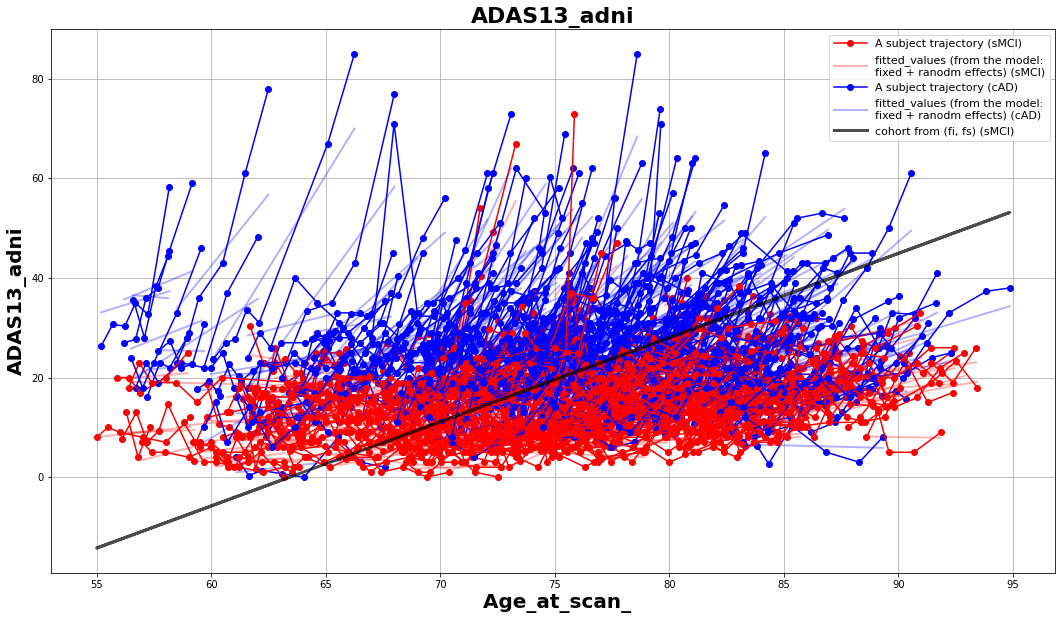

In [25]:
df_2_plot = df_adas
mod_2_plot = mdf_adas
featire_2_plot = 'ADAS13_adni'


a = mlmem.plot_lmem(df_2_plot,
          mod_2_plot,
          featire_2_plot,
          k=-1,
          plot_score=1,  #plot subject score values
          plot_fitted_values=1, #fitter values from the model
          plot_fixed_from_model=0, 
          plot_ranodm_from_fitted_values=0,
          plot_random_from_model=0, 
          print_params=0,
          plot_deviation=0, 
          plot_fixed_effect_for_cohort=1,
          cohort_alpha = 0.7,
          title = featire_2_plot,
          xlabel= ' Age_at_scan_',
          ylabel= featire_2_plot,
          legend=1)

/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:273: RuntimeWarning: invalid value encountered in double_scalars
  fitted_values_slope = (np_fit_val[-1] - np_fit_val[0]) / exam_age_delta
/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:274: RuntimeWarning: invalid value encountered in double_scalars
  cohort_effect_slope = (np_fixed_ef[-1] - np_fixed_ef[0]) / exam_age_delta
/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:275: RuntimeWarning: invalid value encountered in double_scalars
  random_effect_slope = (np_ran_eff_2[-1] - np_ran_eff_2[0]) / exam_age_delta
/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:276: RuntimeWarning: invalid value encountered in double_scalars
  d_slope = (np_score[-1] - np_score[0]) / exam_age_delta


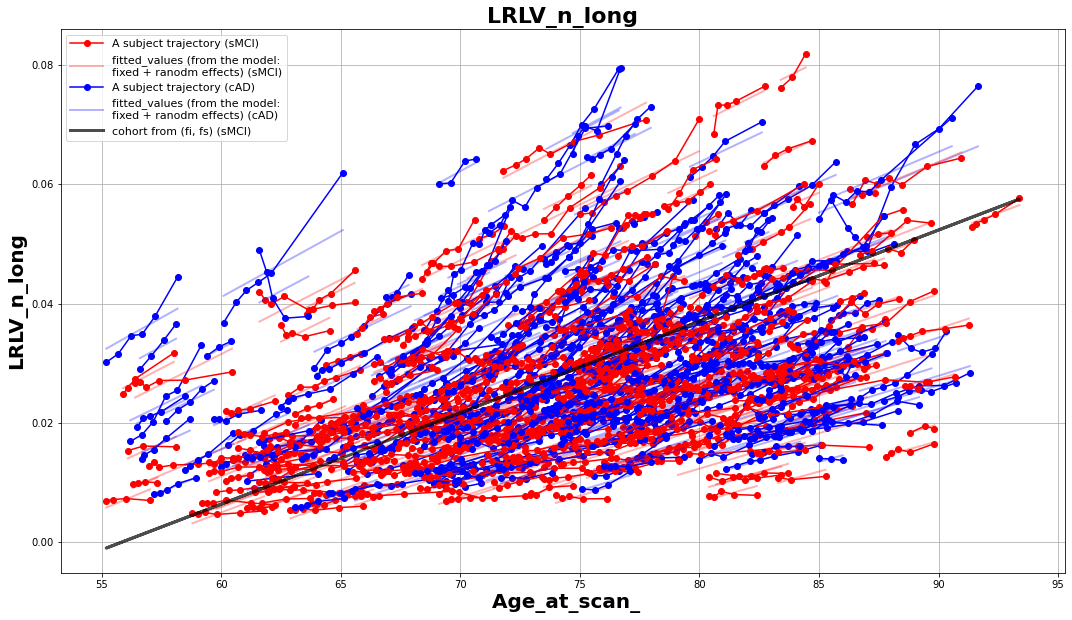

In [26]:
df_2_plot = df_lrlvn_long
mod_2_plot = mdf_lrlvn_long
featire_2_plot = 'LRLV_n_long'


a = mlmem.plot_lmem(df_2_plot,
          mod_2_plot,
          featire_2_plot,
          k=-1,
          plot_score=1,  #plot subject score values
          plot_fitted_values=1, #fitter values from the model
          plot_fixed_from_model=0, 
          plot_ranodm_from_fitted_values=0,
          plot_random_from_model=0, 
          print_params=0,
          plot_deviation=0, 
          plot_fixed_effect_for_cohort=1,
          cohort_alpha = 0.7,
          title = featire_2_plot,
          xlabel= ' Age_at_scan_',
          ylabel= featire_2_plot,
          legend=1)

/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:273: RuntimeWarning: invalid value encountered in double_scalars
  fitted_values_slope = (np_fit_val[-1] - np_fit_val[0]) / exam_age_delta
/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:274: RuntimeWarning: invalid value encountered in double_scalars
  cohort_effect_slope = (np_fixed_ef[-1] - np_fixed_ef[0]) / exam_age_delta
/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:275: RuntimeWarning: invalid value encountered in double_scalars
  random_effect_slope = (np_ran_eff_2[-1] - np_ran_eff_2[0]) / exam_age_delta
/home/marek/Dropbox/p1ext4_P/no_work/MCI/MCI-subgroups/src/mci_lmem.py:276: RuntimeWarning: invalid value encountered in double_scalars
  d_slope = (np_score[-1] - np_score[0]) / exam_age_delta


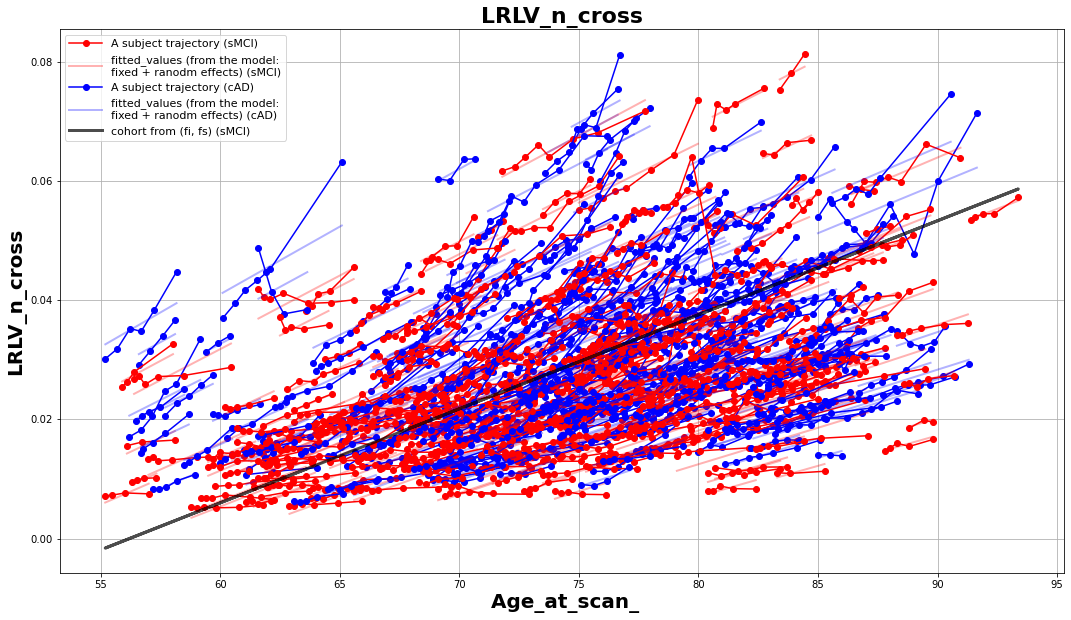

In [27]:
df_2_plot = df_lrlvn_cross
mod_2_plot = mdf_lrlvn_cross
featire_2_plot = 'LRLV_n_cross'


a = mlmem.plot_lmem(df_2_plot,
          mod_2_plot,
          featire_2_plot,
          k=-1,
          plot_score=1,  #plot subject score values
          plot_fitted_values=1, #fitter values from the model
          plot_fixed_from_model=0, 
          plot_ranodm_from_fitted_values=0,
          plot_random_from_model=0, 
          print_params=0,
          plot_deviation=0, 
          plot_fixed_effect_for_cohort=1,
          cohort_alpha = 0.7,
          title = featire_2_plot,
          xlabel= ' Age_at_scan_',
          ylabel= featire_2_plot,
          legend=1)

---